In [1]:
from keras.datasets import cifar10

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 24s 0us/step


In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train[0].shape

(32, 32, 3)

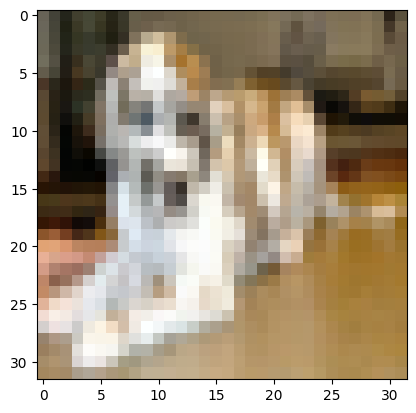

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1111])

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
# x_train[1]
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
from keras.utils import to_categorical

In [19]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1605888   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,610,026
Trainable params: 1,610,026
Non-trainable params: 0
____________________________________________

In [28]:
model.fit(x_train, y_cat_train, epochs=5, verbose=1)

Epoch 1/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7091 - accuracy: 0.7606
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6087 - accuracy: 0.7932
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5078 - accuracy: 0.8283
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4259 - accuracy: 0.8561
Epoch 5/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3515 - accuracy: 0.8815


In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5154 - accuracy: 0.6571


[1.5154205560684204, 0.6571000218391418]

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
import numpy as np
predictions = model.predict(x_test)
# get prediction as probability
predicted_classes = np.argmax(predictions, axis=-1)

313/313 [==============================] - 1s 3ms/step


In [38]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.73      0.66      0.70      1000
           1       0.77      0.78      0.78      1000
           2       0.61      0.46      0.53      1000
           3       0.47      0.55      0.51      1000
           4       0.61      0.61      0.61      1000
           5       0.51      0.58      0.55      1000
           6       0.79      0.66      0.72      1000
           7       0.69      0.77      0.73      1000
           8       0.87      0.67      0.76      1000
           9       0.64      0.82      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

